In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
heart_data = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
heart_data_x = heart_data.drop("HeartDisease",axis=1)
heart_data_y = heart_data["HeartDisease"]

In [16]:
#Replace all categorical data with dummy variables through one-hot-encoding
heart_data_x_encoded = pd.get_dummies(heart_data_x,drop_first=True)
heart_data_x_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


In [18]:
X_train,X_test,y_train,y_test = train_test_split(heart_data_x_encoded,heart_data_y,test_size=.3)

In [23]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train,y_train)

train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)

train_acc = accuracy_score(y_train,train_predictions)
test_acc = accuracy_score(y_test,test_predictions)

print("train_acc",train_acc)
print("test_acc",test_acc)

train_acc 0.8348909657320872
test_acc 0.8369565217391305


In [29]:
#HyperParameter Tuning
best_acc = 0

for criterion in ["gini","entropy"]:
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5,10,20,30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth,criterion=criterion,min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train,y_train)
            test_predictions = dtree.predict(X_test)
            test_acc = accuracy_score(test_predictions,y_test)
            if test_acc > best_acc:
                best_params = f"criterion:{criterion},max_depth:{max_depth},min_samples_leaf:{min_samples_leaf}"
                best_acc = test_acc

In [30]:
print(best_params)
print(best_acc)

criterion:gini,max_depth:4,min_samples_leaf:10
0.8405797101449275


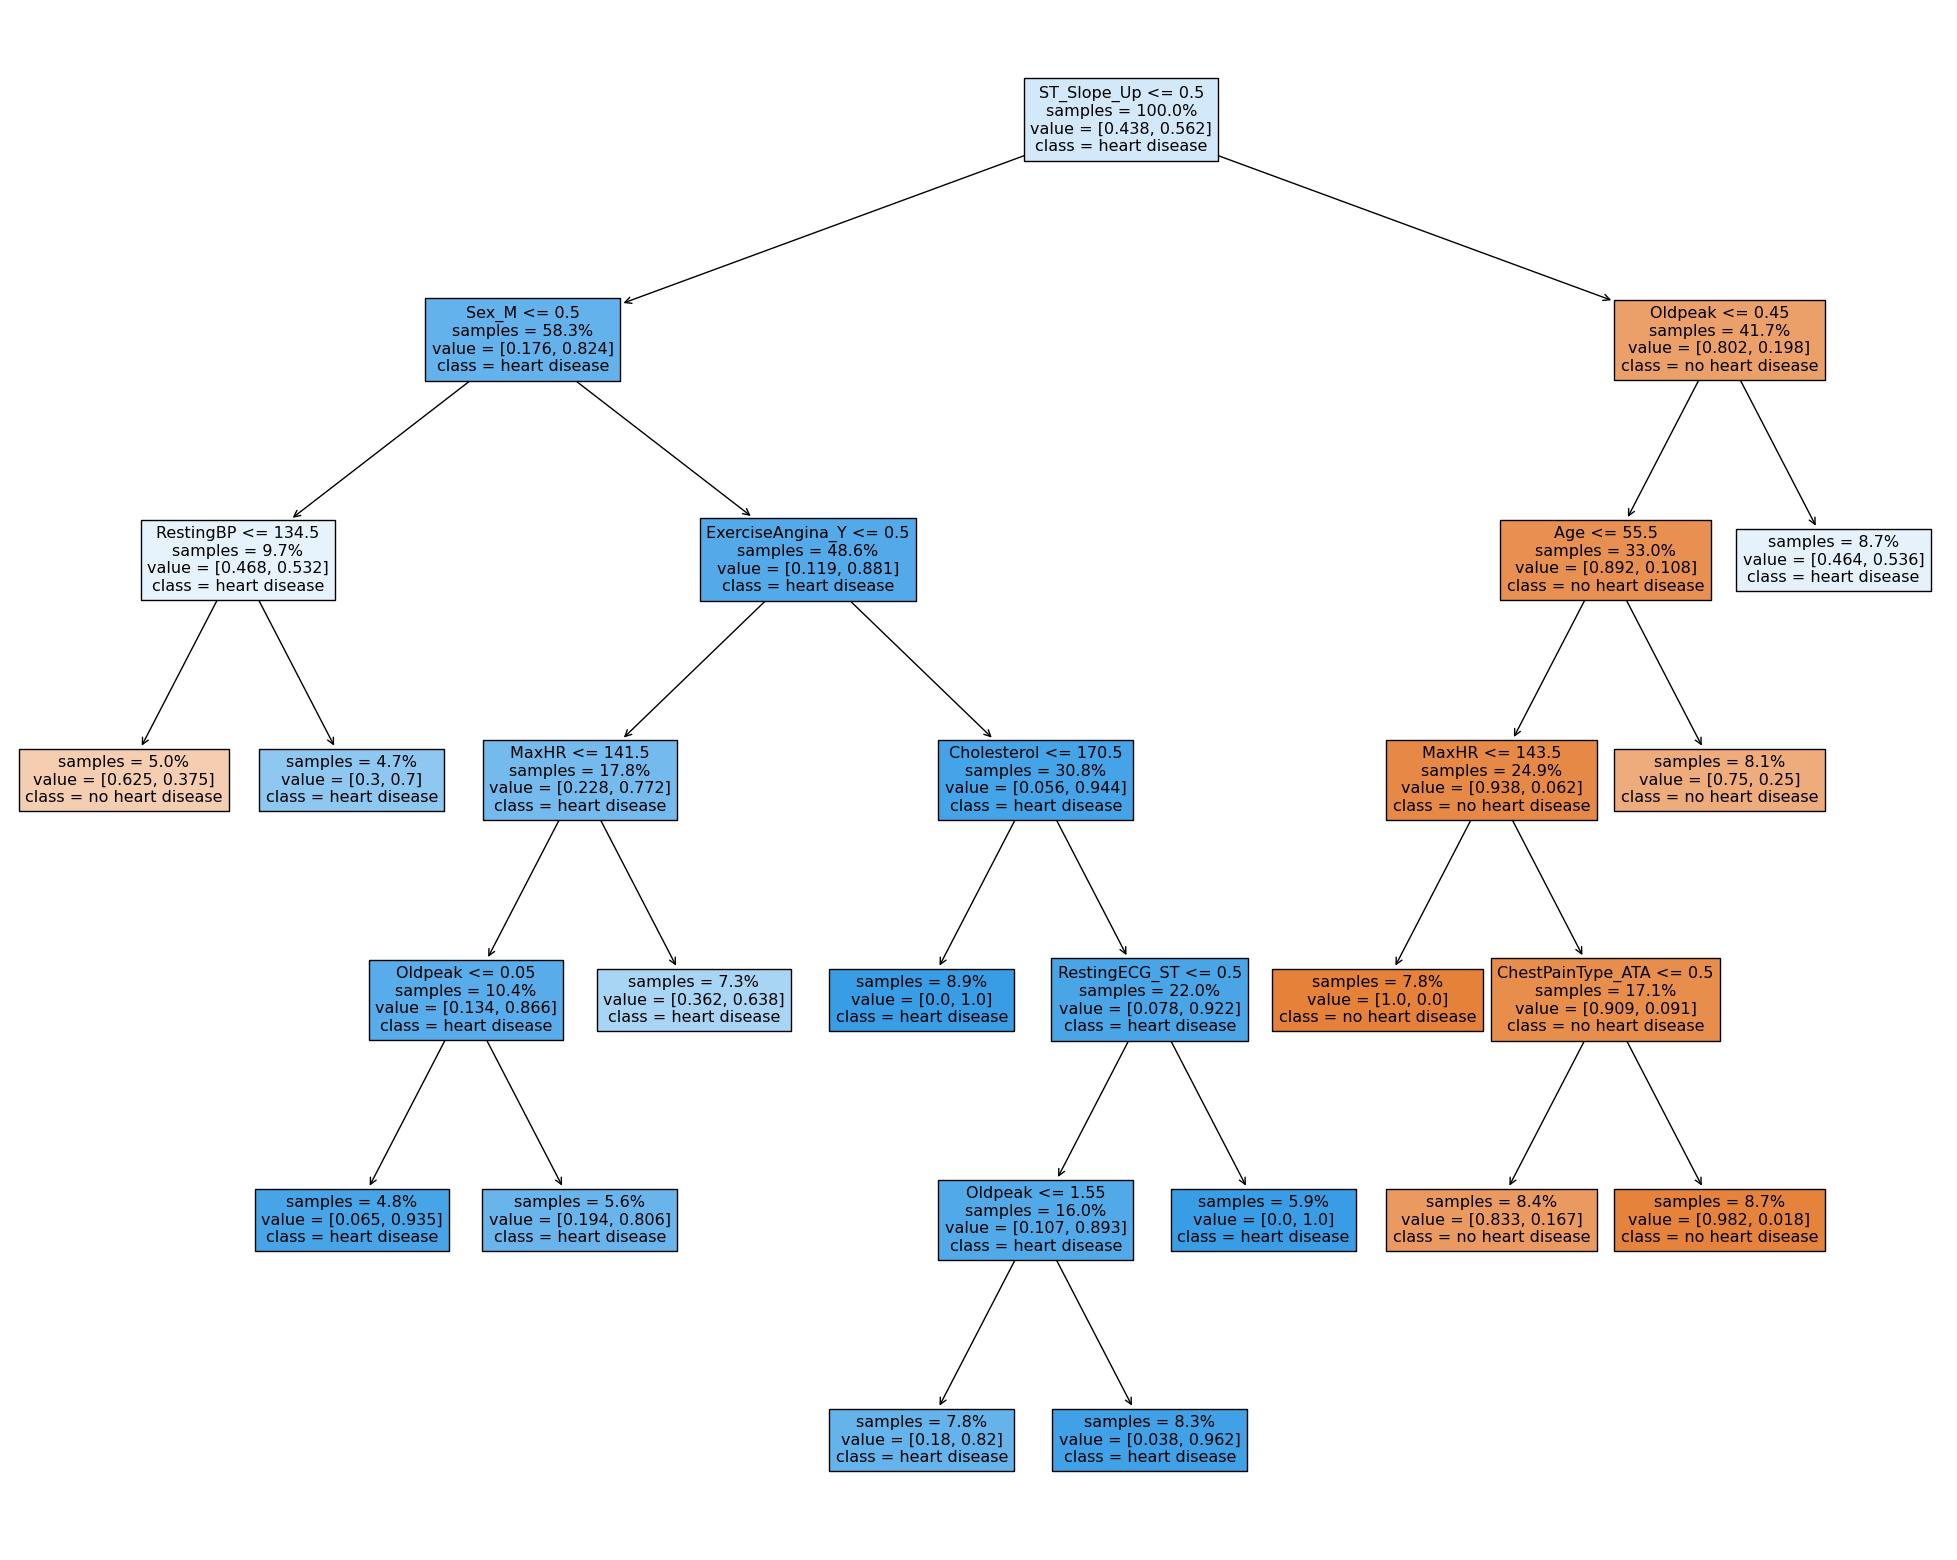

In [31]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = ((25,20)))
plot_tree(dtree,feature_names = heart_data_x_encoded.columns,
         class_names = ['no heart disease','heart disease'],
         impurity = False,
         proportion = True,
         filled = True
         )
fig.savefig('heart_failure_decision_tree.png')
